# Heart Failure Model Training Notebook

### Import required modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

### Read Dataset

In [3]:
# Read dataset from csv
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Dataset Preview
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Dataset Structure
df.shape

(299, 13)

In [5]:
## Statistical Overview of dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Data Visualisation

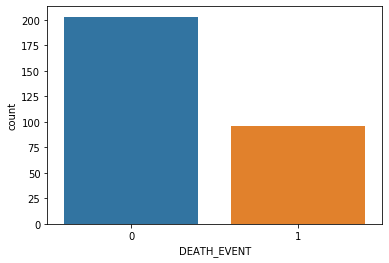

In [6]:
# Total Number of Death event due to heart failure
sns.countplot(x="DEATH_EVENT", data=df)

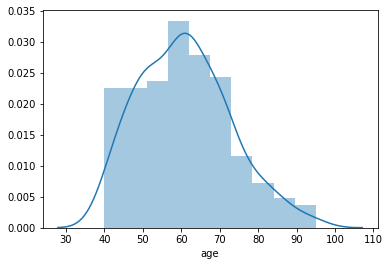

In [7]:
# Age Distribution
sns.distplot(df.age)

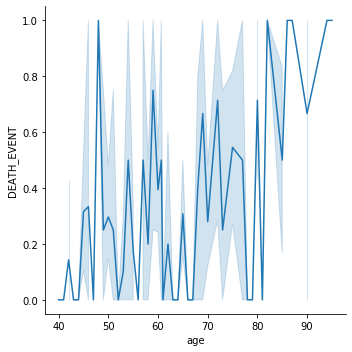

In [8]:
# Relational Plot between Death Event and Age 
sns.relplot(
    data=df, kind="line",
    x="age", y="DEATH_EVENT",
)

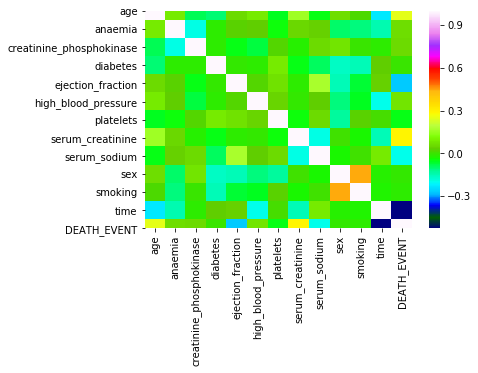

In [9]:
# Heatmap
sns.heatmap(df.corr(), cmap='gist_ncar')

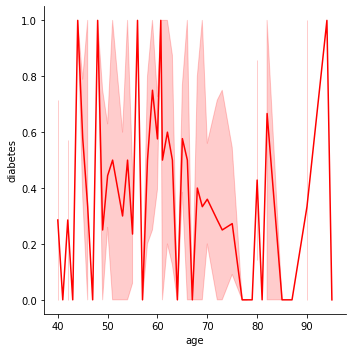

In [10]:
# Relational Plot between Diabetes and Age 
sns.relplot(kind ="line", x= "age", y = "diabetes", data = df, color="red")

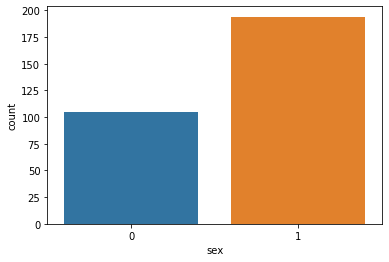

In [11]:
sns.countplot(x="sex", data=df)

### Data Pre-processing

In [12]:
# Label preprocessing
X = df.loc[:, df.columns != 'DEATH_EVENT']
y = df['DEATH_EVENT']

In [13]:
# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
print (X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(239, 12) (60, 12) (239,) (60,)


### Model Training

In [15]:
clf_LR = LogisticRegression()
clf_LR.fit(X_train,y_train)

D:\Program-Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
clf_LR.coef_

array([[ 2.66315049e-02, -2.50368836e-05,  1.64968961e-04,
         4.81441435e-04, -3.51612701e-02, -2.36839392e-04,
        -3.03828601e-06,  4.54425073e-03,  1.26966435e-02,
        -7.12551270e-07, -1.28326770e-04, -1.79517720e-02]])

In [17]:
clf_LR.intercept_

array([0.00019188])

### Model Prediction

In [18]:
y_test_pred = clf_LR.predict(X_test)

In [19]:
# Confusion Matrix
confusion_matrix(y_test, y_test_pred)

array([[43,  3],
       [ 4, 10]], dtype=int64)

In [20]:
# Accuracy Score
accuracy_score(y_test, y_test_pred)

0.8833333333333333

In [21]:
# ROC AUC Score
roc_auc_score(y_test, y_test_pred)

0.8245341614906833

In [22]:
precision_score(y_test, y_test_pred)

0.7692307692307693

In [23]:
recall_score(y_test, y_test_pred)

0.7142857142857143

### Save Trained Model

In [24]:
filename = 'finalized_model.sav'
pk.dump(clf_LR, open(filename, 'wb'))

### Load Model

In [25]:
loaded_model = pk.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8833333333333333


In [26]:
type(X_test)

pandas.core.frame.DataFrame

In [27]:
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
173,50.000,1,115,0,20,0,189000.00,0.80,139,1,0,146
287,45.000,0,582,1,55,0,543000.00,1.00,132,0,0,250
51,53.000,1,91,0,20,1,418000.00,1.40,139,0,0,43
146,52.000,0,132,0,30,0,218000.00,0.70,136,1,1,112
214,65.000,1,135,0,35,1,290000.00,0.80,134,1,0,194
197,65.000,0,167,0,30,0,259000.00,0.80,138,0,0,186
274,60.000,1,257,1,30,0,150000.00,1.00,137,1,1,245
62,55.000,0,109,0,35,0,254000.00,1.10,139,1,1,60
27,70.000,0,122,1,45,1,284000.00,1.30,136,1,1,26
201,45.000,0,308,1,60,1,377000.00,1.00,136,1,0,186


In [28]:
loadedModel = pk.load(open('finalized_model.sav', 'rb'))
result = loadedModel.predict(X_test)
print(result)

[0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


In [29]:
X_test.shape

(60, 12)

In [32]:
log_reg = LogisticRegression()
pk.dump(log_reg,open('modelhrt.pkl','wb'))
model=pk.load(open('modelhrt.pkl','rb'))